# Displays the binned data from selected .csv files for the science distrobution

Must be run on: python 3.12.0, SciPy 1.13.1, and numpy 2.0.1

In [1]:
%reset
import numpy as np
import csv
from scipy.optimize import *
import sys
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)
import datetime
from scipy.stats import genpareto
from sympy import *

# Load in selected .csv files

The files to be loaded are the names in the files array. Do not include the file extension

In [2]:
#import cell

#science
data = []
files = ['bins_science26-10-2024_15_31_04', 'bins_science27-10-2024_10_26_34','bins_science27-10-2024_11_44_12','bins_science27-10-2024_16_04_30', 'bins_science28-10-2024_10_59_43','bins_science28-10-2024_15_41_39','bins_science28-10-2024_20_16_14' ]
#take data from experiments csv and convert it to an array
for i in files:
    with open(i +'.csv', 'rt') as f:
        array_y = csv.reader(f, skipinitialspace=True, quotechar="'")
        for line in array_y:
            data.append(line)

bin_val = np.asarray(data[0],float)
bins = np.asarray(data[1],float)
for i in range(1,len(files)):
    for j in range(len(bins)):
        bins[j] += float(data[1+i*2][j])

num_bins = len(bin_val)

# Plot the distrobution and calculate the statistics

redline represents chosen score

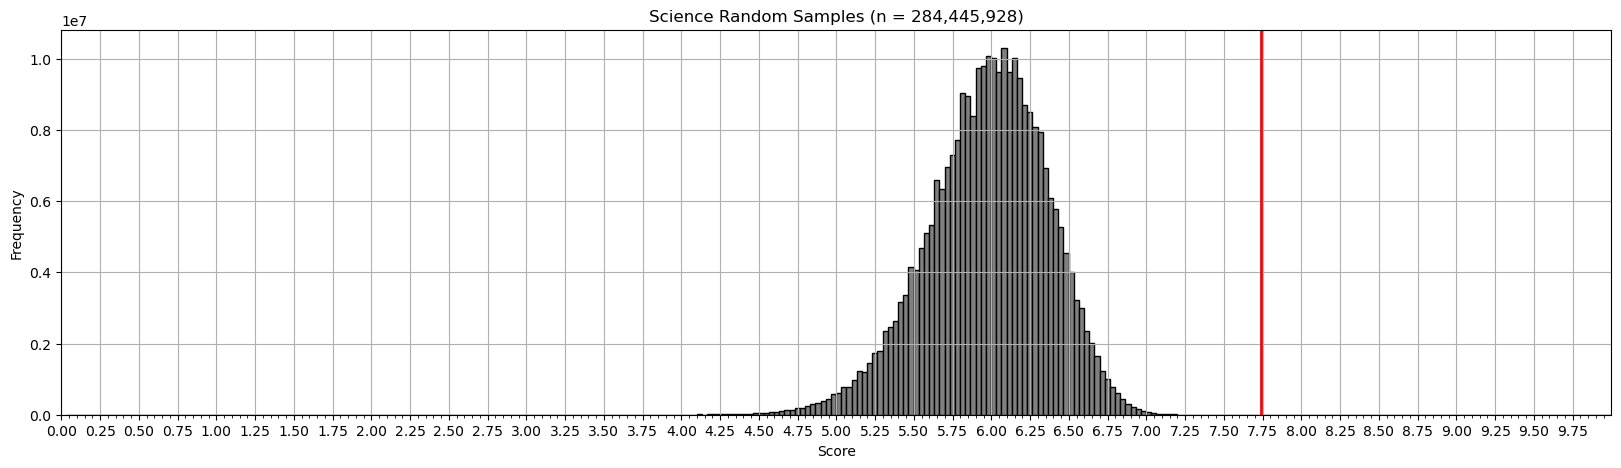

Number of Valid Missions     :   284445928
Max Score                    :   7.5649999999999995
Mean Score                   :   5.956796255561092
Standard Deviation           :   0.3868225527387193
Z-score                      :   4.61504566318482
probablity from z-score      :   0.999998034955514


In [4]:
# plotter
bin_tval = bin_val - (0.5)*(1/num_bins)
sample_size = int(sum(bins))
plt.figure(figsize=(20,5))
plt.bar(bin_tval, bins, width=10/num_bins, edgecolor='black', align='edge',color='grey')
plt.xlim(0,10)
plt.xticks(np.arange(0,10,.25))
plt.xticks(np.arange(0,10,.05),minor=True)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Science Random Samples (n = ' + f"{sample_size:,}" + ')')
plt.axvline(x=7.742, color='red', linestyle='-', linewidth=2, label=f'best seen')
plt.grid(True)

plt.show()
mean = (bin_tval @ bins) / sample_size
std = np.sqrt( (bin_tval - mean)**2 @ bins / sample_size)
max_score = 0
for i in range(len(bins)):
    if bins[i] > 0:
        max_score = bin_tval[i]
print('Number of Valid Missions     :   ' + str(sample_size))
print('Max Score                    :   ' + str(max_score))
print('Mean Score                   :   ' + str(mean))
print('Standard Deviation           :   ' + str(std))
zscore = (7.742-mean)/std
print('Z-score                      :   ' + str(zscore))
x = Symbol('x')
eq = (1/((2*np.pi)**(0.5)))*exp(-x**2/2)
prob = (integrate(eq,(x, 0, zscore)) + 0.5).evalf()
print('probablity from z-score      :   ' + str(prob))